# 🐵 Face Expression Classification

[Face Expression Classification - Repo | officialpm](https://github.com/officialpm/Face-Expression-Classification-CNN)

####**`💚 Developed by`** [Parth Maniar](https://github.com/officialpm)

<div>
<a href="https://twitter.com/parthcodes">
  <img   align="left" alt="Parth | Twitter" width="22px"  src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkdeIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>
<a href="https://www.instagram.com/parthroxx/">
  <img align="left" alt="Parth's Instagram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/instagram.svg" />
</a>
</div>
<br/>


---


## `• Problem`

Identifying the face expression of a human, given an image of him/her.

## `• Data`
  
Data is taken from Kaggle's Facial Expression Recognition Challenge:
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


## `• Evaluation`

Evaluation is done based on accuracy and loss between predicted expression and actual expression.

## `• Features`

Some information about the data:
* We're dealing with images(unstructured data), so its better we use deep learning / transfer learning.
* Dataset has **3** columns namely emotions, picture, and usage(Training/Testing).
* Dataset has **35887** rows(images).
* There are **28709** training images (with column value as Training).
* There are **3589** testing images (with column value as PublicTest).
* Dataset has **7 classes** (emotions).
  * 0 -> Angry
  * 1 -> Disgust
  * 2 -> Fear
  * 3 -> Happy
  * 4 -> Sad
  * 5 -> Surprise
  * 6 -> Neutral


## Initializing

In [1]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,043 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-p

In [2]:
!git-lfs clone https://github.com/officialpm/Face-Expression-Classification-CNN

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'Face-Expression-Classification-CNN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 34 (delta 6), reused 29 (delta 4), pack-reused 0
Unpacking objects: 100% (34/34), done.
Git LFS: (1 of 1 files) 287.13 MB / 287.13 MB


In [3]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
base_path = "Face-Expression-Classification-CNN"
%matplotlib inline

### Check GPU

In [4]:
# Check for GPU availability
print("Hey Parth Maniar, GPU ", "available :) !!" if tf.config.list_physical_devices("GPU") else "not available :(")

Hey Parth Maniar, GPU  available :) !!


##Data

In [5]:
raw_df = pd.read_csv(f"{base_path}/Data/fer2013.csv")

## Creating Train and Test Datasets

### Initialize the total number of classes

In [6]:
# Initialize the total number of classes
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral

### Initialize training and test datasets

In [7]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y) #NORMALIZE
    return X, Y

In [8]:
X, Y = getData(f"{base_path}/Data/fer2013.csv")
num_class = len(set(Y))
print(num_class)

7


In [9]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


### Reshape the inputs

In [11]:
# Reshape each value from 1D(28709) to 3D(48,48,1)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

32298 train samples
3589 test samples


In [12]:
X_train.shape

(32298, 48, 48, 1)

## Construct a CNN (Convolutional Neural Network)

Here we can start with Keras-Sequential as our base model.
https://keras.io/api/models/sequential/

### Create a model

In [13]:
width, height = 48, 48
batch_size = 64
num_features = 64

In [14]:
model = Sequential()

# 1st Convolutional Layer 
model.add(Conv2D(256, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 2nd Convolutional Layer 
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd Convolutional Layer 
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer 
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 5th Convolutional Layer 
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 6th Convolutional Layer 
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#1st Dense Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2nd Dense Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

#3rd Dense Layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Output
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 256)       2560      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 46, 46, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 256)       0

## Adding Early Stopping

In [15]:
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

## Batch Wise Data

In [16]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [17]:
dataGEN = data_generator.flow(X_train, y_train, batch_size)

## Fit the model

In [19]:
# Assign number of epochs
epochs = 70 #@param{type:"slider", min:0, max:250, step:10}

In [20]:
modelPath=f'{base_path}/Models/Face_Expression_Classfication_v2_model.h5' # save model at this location after each epoch
history = model.fit_generator(  dataGEN,
                                steps_per_epoch=len(X_train) / batch_size,
                                epochs=epochs,
                                verbose=1, 
                                callbacks = [es, ModelCheckpoint(filepath=modelPath)],
                                validation_data=(X_test,y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/70
505/504 [==============================] - 97s 193ms/step - loss: 1.6765 - accuracy: 0.3316 - val_loss: 1.7100 - val_accuracy: 0.3004
Epoch 2/70
505/504 [==============================] - 95s 188ms/step - loss: 1.3743 - accuracy: 0.4716 - val_loss: 1.5100 - val_accuracy: 0.3979
Epoch 3/70
505/504 [==============================] - 95s 188ms/step - loss: 1.2331 - accuracy: 0.5286 - val_loss: 1.1991 - val_accuracy: 0.5313
Epoch 4/70
505/504 [==============================] - 95s 188ms/step - loss: 1.1593 - accuracy: 0.5603 - val_loss: 1.2123 - val_accuracy: 0.5213
Epoch 5/70
505/504 [==============================] - 95s 188ms/step - loss: 1.1037 - accuracy: 0.5812 - val_loss: 1.4739 - val_accuracy: 0.4483
Epoch 6/70
505/504 [==============================] - 95s 188ms/step - loss: 1.0734 - accuracy: 0.5926 - val_loss: 1.0348 - val_accuracy: 0.6127
Epoch 7/70
505/504 [==============================] - 

## Load the saved model

We can load the model in two ways:
* Using Keras `load_model()`
* Using Pickle `load()`

The loaded model can be directly used of prediction.

In [21]:
import pickle

# Load a model using Keras or Pickle

def load_model(load_method='Keras'):
  model = None
  if load_method == 'Keras':
    # Method 1: Using Keras
    model = keras.models.load_model(modelPath)
  elif load_method == 'Pickle':
    # Method 2: Using Pickle
    with open(modelPath, 'rb') as f:
      model = pickle.load(f)
  
  print("Model Loaded.")
  return model

In [22]:
loaded_model = load_model(load_method='Keras')

Model Loaded.


## Evaluate the trained model

Use the `evaluate()` method to evalute the trained model against train and test dataset

In [23]:
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train loss : {train_score[0]}")
print(f"Train accuracy : {train_score[1]}")
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss : {test_score[0]}")
print(f"Test accuracy : {test_score[1]}")

1010/1010 [==============================] - 32s 32ms/step - loss: 0.6945 - accuracy: 0.7375
Train loss : 0.694532036781311
Train accuracy : 0.7374759912490845
113/113 [==============================] - 4s 31ms/step - loss: 0.9298 - accuracy: 0.6592
Test loss : 0.9297972321510315
Test accuracy : 0.6592365503311157


### Function to analyze and plot the prediction results

In [24]:
def analyze_emotion(emotions):
  label_values = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_seq = np.arange(len(label_values))
  fig, ax = plt.subplots()
  ax.bar(y_seq, emotions, align='center', alpha=0.5)
  ax.set_xticks(y_seq)
  ax.set_xticklabels(label_values, color='black')
  ax.set_ylabel("Percentage", color='black')
  ax.set_title("Emotion", color='black')
  plt.show()

### Confusion Matrix

Plotting a confusin matrix between predicted labels and truth(ground) labels

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


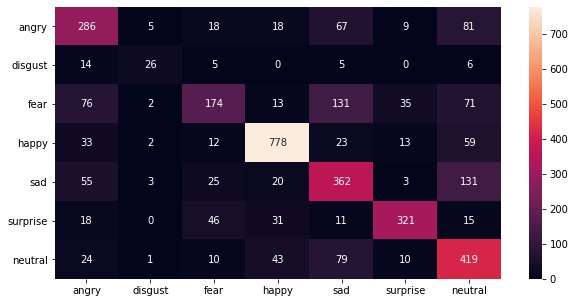

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

label_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
label_values = [0,1,2,3,4,5,6]

# Make a predictions predictions list
y_preds = loaded_model.predict(X_test)
y_preds_mod, y_test_mod = [], []

for pred in y_preds:
  y_preds_mod.append(np.argmax(pred))

for truth in y_test:
  y_test_mod.append(np.argmax(truth))

# Create a confusion matrix
cm = confusion_matrix(y_test_mod, y_preds_mod, labels=label_values)

# Visualize the confusion matrix using Seaborn heatmap
df_cm = pd.DataFrame(cm,
                     index=label_names,
                     columns=label_names)
plt.figure(figsize=(10,5))
sn.heatmap(df_cm, annot=True, fmt='g');

## Testing with custom (external) data


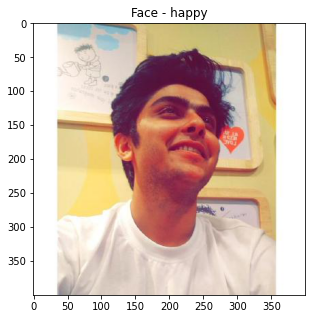

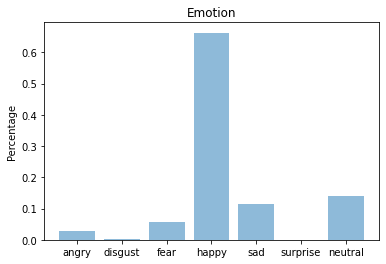

In [26]:
file = f"{base_path}/Data/Images/45627498.jpg"
actual_image = image.load_img(file)
img = image.load_img(file, color_mode='grayscale', target_size=(48,48))

X_custom = image.img_to_array(img)
X_custom = np.expand_dims(X_custom, axis=0)

X_custom /= 255

y_custom = loaded_model.predict(X_custom)

m=0.000000000000000000001
a=y_custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(actual_image)
ax.set_title(f'Face - {label_names[ind]}');

analyze_emotion(y_custom[0])